# Course Project: Titanic Exploratory Data Analysis and Model

DBDA.X427.(9) Python for Machine Learning and Artificial Intelligence_ Essentials </br>
by Sena Kaya

~~~~
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered 
“unsinkable” RMS Titanic sank after colliding with an iceberg. 

Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting 
in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some 
groups of people were more likely to survive than others.


~~~~
[Dataset Source](https://www.kaggle.com/c/titanic)


### The Datasets

The dataset has been split into two groups:

__training set (train.csv)__

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

__test set (test.csv)__

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

__Dataset schema__


|Variable| Definition | Field values |
|:---|:---| --- |
| survival | Passenger survived     | 0 = No, 1 = Yes |
| pclass   | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex      | Gender          |   |
| Age      | Age in years | |
| sibsp	   | # of siblings/spouses aboard 	| |
| parch	   | # of parents/children aboard 	| |
| ticket   | Ticket number | |
| fare	   | Passenger fare	| |
| cabin	   | Cabin number	| Cabin codes have info about location in the ship |
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |
`

### Variable Notes</br>
***pclass:*** A proxy for socio-economic status (SES) </br>
-1st = Upper</br>
-2nd = Middle</br>
-3rd = Lower</br>
</br>
***age:*** Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5</br>
</br>
***sibsp:*** The dataset defines family relations in this way...</br>
-Sibling = brother, sister, stepbrother, stepsister</br>
-Spouse = husband, wife (mistresses and fiancés were ignored)</br>
</br>
***parch:*** The dataset defines family relations in this way...</br>
-Parent = mother, father</br>
-Child = daughter, son, stepdaughter, stepson</br>
-Some children travelled only with a nanny, therefore parch=0 for them.

## Project Structures
-Data Cleaning</br>
-Feature Engineering</br>
-Exploratory Data Analysis</br>
-Creating a pipeline</br>
-Feature Importance</br>
-Outcomes

In [1]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")

In [2]:
#pip install klib

In [3]:
#pip install holoviews

In [4]:
import enum
import csv
import klib
import numpy as np
import pandas as pd
import seaborn as sns
import holoviews as hv
import matplotlib.pyplot as plt
from typing import List
%matplotlib inline
from itertools import product
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC, LinearSVC
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


Read the train dataset to figure out raw data

In [5]:
df_train = pd.read_csv('./data/train.csv')
df_train.tail(10)

PassengerId  Survived  Pclass                                      Name  \
881          882         0       3                        Markun, Mr. Johann   
882          883         0       3              Dahlberg, Miss. Gerda Ulrika   
883          884         0       2             Banfield, Mr. Frederick James   
884          885         0       3                    Sutehall, Mr. Henry Jr   
885          886         0       3      Rice, Mrs. William (Margaret Norton)   
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
881    male  33.0      0      0            349257   7.8958   NaN        S  
882  female  22.0      0      0              7552  10.5167   NaN        S  
883    male  28.0      0      0  C.A./SOTON 34068  10.5000   NaN        S  
884    male  25.0      0      0   SOTON/OQ 392076   7.0500   NaN        S  
885  female  39.0      0      5            382652  29.1250   NaN        Q  
886    male  27.0      0      0            211536  13.0000   NaN        S  
887  female  19.0      0      0            112053  30.0000   B42        S  
888  female   NaN      1      2        W./C. 6607  23.4500   NaN        S  
889    male  26.0      0      0            111369  30.0000  C148        C  
890    male  32.0      0      0            370376   7.7500   NaN        Q

Read the test dataset

In [6]:
df_test = pd.read_csv('./data/test.csv')
df_test.head(10)

PassengerId  Pclass                                       Name     Sex  \
0         1284       3              Abbott, Master. Eugene Joseph    male   
1         1237       3                Abelseth, Miss. Karen Marie  female   
2          949       3              Abelseth, Mr. Olaus Jorgensen    male   
3         1143       3   Abrahamsson, Mr. Abraham August Johannes    male   
4          900       3  Abrahim, Mrs. Joseph (Sophie Halaut Easu)  female   
5         1199       3                  Aks, Master. Philip Frank    male   
6          970       2             Aldworth, Mr. Charles Augustus    male   
7         1198       1       Allison, Mr. Hudson Joshua Creighton    male   
8         1102       3                Andersen, Mr. Albert Karvin    male   
9         1106       3     Andersson, Miss. Ida Augusta Margareta  female   

     Age  SibSp  Parch            Ticket      Fare    Cabin Embarked  Survived  
0  13.00      0      2         C.A. 2673   20.2500      NaN        S         0  
1  16.00      0      0            348125    7.6500      NaN        S         1  
2  25.00      0      0            348122    7.6500    F G63        S         1  
3  20.00      0      0  SOTON/O2 3101284    7.9250      NaN        S         1  
4  18.00      0      0              2657    7.2292      NaN        C         1  
5   0.83      0      1            392091    9.3500      NaN        S         1  
6  30.00      0      0            248744   13.0000      NaN        S         0  
7  30.00      1      2            113781  151.5500  C22 C26        S         0  
8  32.00      0      0            C 4001   22.5250      NaN        S         0  
9  38.00      4      2            347091    7.7750      NaN        S         0

Calculate the number of different values for each column

In [7]:
unique_counts = df_train.nunique()
print(unique_counts)

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64


In [8]:
import pandas as pd
# from pandas_profiling import ProfileReport
from ydata_profiling import ProfileReport

dimensions of dataset

In [9]:
df_train.shape

(891, 12)

summary of the structure of the data frame

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


descriptive statistics of quantitative variables

In [11]:
df_train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

Generate the Pandas Profiling report 

In [12]:
profile = ProfileReport(df_train, title='Pandas Profiling Report', explorative=True) 
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Outcomes according to the Profile Report 
#### Overview 
-Number of observations is 891 and number of variables is 12. 7 of the variables are categorical and 5 of them are numerical.</br>
-There is 866 missing cells (8.1%).</br>
-There is no duplicate rows.</br>
#### PassengerId
-Numerical value</br>
-There are no duplicates or missing cells as all passenger IDs are unique.
#### Survived
-Categorical value.</br>
-There is no missing cell. </br>
-There are only two different values, 1 (38.4%) for survivors and 0 (61.6%) for non-survivors.
#### Pclass
-Categorical value</br>
-There is no missing cell. </br>
-There are 3 different categories:</br>
- There are 491 (55.1%) count for class #3
- There are 184 (20.7%) count for class #2
- There are 216 (24.2%) count for class #1

#### Name
-Categorical value</br>
-There is no missing cell. </br>
- The most common word of name is Mr. (count= 521, 14.4% ),
- 2nd max is Miss (count= 182, 5%), 
- 3rd max is Mrs (count= 129, 3.6%),
- 4th max is William (count= 64, 1.8% ).

#### Sex
-Categorical value</br>
-There is no missing cell. </br>
-There are two different values and these are 577 (64.8%) men and 314 (35.2%) women.

#### Age
-Numerical value</br>
-There are 177 missing cells (19.9%)</br>
-When we dive into data for age feature:
- Median is 28,
- Mean is 29.6,
- Minimum is 0.42,
- 95-th percentile is 56,
- Maximum is 80. </br>
Therefore approximately normal distribution.</br>

#### SibSp
-Numerical value</br>
-There is no missing cell. </br>
-It was observed that 608 passengers (68.2%) traveled without any siblings or spouses. 209 passengers (23.5%) had 1 big family member and 28 passengers (3.1%) had 2 family members.</br>
-The interesting point is that the SibSp value is 8 for 7 passengers.


#### Parch
-Numerical value</br>
-There is no missing cell. </br>
-It was observed that 678 passengers (76.1%) traveled without their parents or children. 118 passengers (13.2%) had 1 family member and 80 passengers (9%) had 2 family members.</br>
-The interesting point is that the Parch value is 6 for only 1 passenger. If a person had 6 family members, the other 5 passengers had to have a Parch value of 6. For example, according to data with Parch value of 5 passengers equal to 5. It's the same for number 4.

#### Ticket
-Categorical value</br>
-There is no missing cell. </br>
-There is high cardinality because of 681 unique value.</br>

#### Fare
-Numerical value. </br>
-There is no missing cell. </br>
-When we dive into data for fare feature:</br>
- Minimum is 0 and there are 15
- Median is 14.5
- Mean is 32
- 95-th percentile is 112
- Maximum is 512 and there are 3, 2nd maximum is 263 and there are 4.
- Common values between 7 and 26.</br>
Therefore, there is a huge difference between the price of tickets.

#### Cabin
-Numerical value. </br>
-There are 687 missing cells (77.1%).</br>
-There are 147 different name cabin names. </br>

#### Embarked
-Categorical value</br>
-There are 2 missing cells (0.2%). </br>
-There are only three different values;
- 644 passengers boarded from Southampton (72.4%)
- 168 passengers boarded from Cherbourg (18.9%)
- 77 passengers boarded from Queenstown (8.7%)

Make the sex attribute numeric for example replace the male value with 1 and female value with 0.

In [13]:
debug = False

In [14]:
def Binary_sex (dataset):
    
    dataset['Sex'] = dataset['Sex'].replace('male', 0)
    dataset['Sex'] = dataset['Sex'].replace('female', 1)
    dataset['Sex'].astype(int)
    if debug: 
        print('Sex feature converted the one hot encoding and female=1 , male=0')
    return dataset


In [15]:
df_train=Binary_sex(df_train)

Correlation Matrix to figure out relation between features

/var/folders/6z/wvkv_pyn7p15h1q5x5g4_qb00000gn/T/ipykernel_20360/4015432231.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df_train.corr()


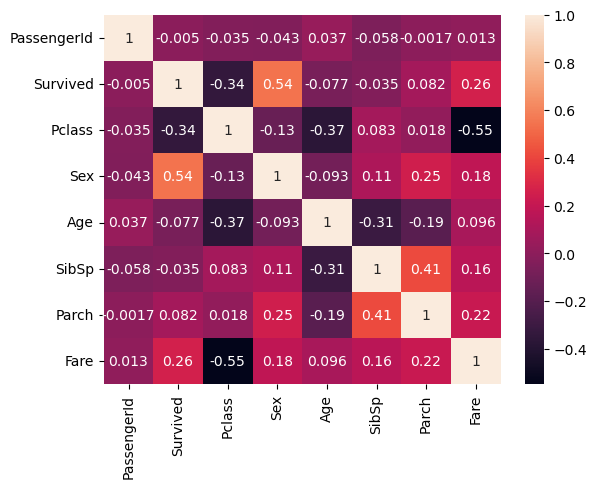

             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000 -0.005007 -0.035144 -0.042939  0.036847 -0.057527   
Survived       -0.005007  1.000000 -0.338481  0.543351 -0.077221 -0.035322   
Pclass         -0.035144 -0.338481  1.000000 -0.131900 -0.369226  0.083081   
Sex            -0.042939  0.543351 -0.131900  1.000000 -0.093254  0.114631   
Age             0.036847 -0.077221 -0.369226 -0.093254  1.000000 -0.308247   
SibSp          -0.057527 -0.035322  0.083081  0.114631 -0.308247  1.000000   
Parch          -0.001652  0.081629  0.018443  0.245489 -0.189119  0.414838   
Fare            0.012658  0.257307 -0.549500  0.182333  0.096067  0.159651   

                Parch      Fare  
PassengerId -0.001652  0.012658  
Survived     0.081629  0.257307  
Pclass       0.018443 -0.549500  
Sex          0.245489  0.182333  
Age         -0.189119  0.096067  
SibSp        0.414838  0.159651  
Parch        1.000000  0.216225  
Fare         0.216225  1.

In [16]:
corr_matrix=df_train.corr()
sns.heatmap(corr_matrix,annot=True)
plt.show()
print(corr_matrix)

-There is biggest negative correlation between *Fare* and *Pclass* (-0.55). </br>
-There is 2nd negative correlation between *Sex* and *Survived* (-0.54). </br>
-There is 3rd biggest negative correlation between *Survived* and *Pclass*(-0.33).</br>
-There is biggest positive correlation between *Parch* and *SibSp* (0.414).</br>
-There is 2nd biggest positive correlation between *Survived* and *Fare* (0.25).  
**Assumptions** </br>
It means <u>upper class passengers</u> were more likely to have survived.</br>
It means <u>female passengers</u> were more likely to have survived.</br>


Groupby dataframe by Plcass feature to calculate survival rate

In [17]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)

Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

Groupby dataframe by Sex feature to calculate survival rate

In [18]:
df_train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

Sex  Survived
1    1  0.742038
0    0  0.188908

Groupby dataframe by Fare feature to calculate survival rate

In [19]:
df_train[['Fare','Survived']].groupby(['Fare'],as_index=False).mean().sort_values(by='Survived',ascending=False)[0:20]

Fare  Survived
247  512.3292       1.0
196   57.9792       1.0
89    13.8583       1.0
88    13.7917       1.0
86    13.4167       1.0
83    12.6500       1.0
81    12.4750       1.0
79    12.2875       1.0
194   56.9292       1.0
77    12.0000       1.0
195   57.0000       1.0
74    11.1333       1.0
197   59.4000       1.0
52     8.5167       1.0
201   63.3583       1.0
202   65.0000       1.0
68     9.8417       1.0
204   69.3000       1.0
207   71.2833       1.0
209   75.2500       1.0

Density of Fare:

<AxesSubplot: xlabel='Fare', ylabel='Density'>

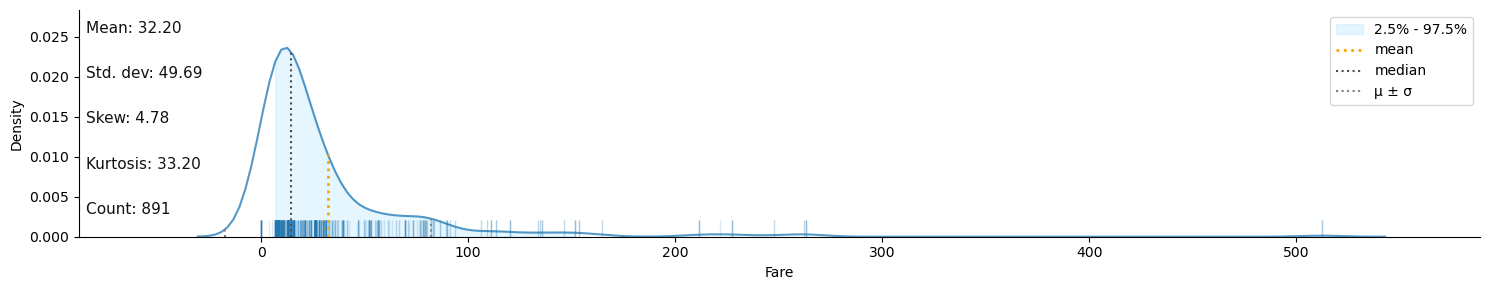

In [20]:
klib.dist_plot(df_train['Fare'])

Density of Age:

<AxesSubplot: xlabel='Age', ylabel='Density'>

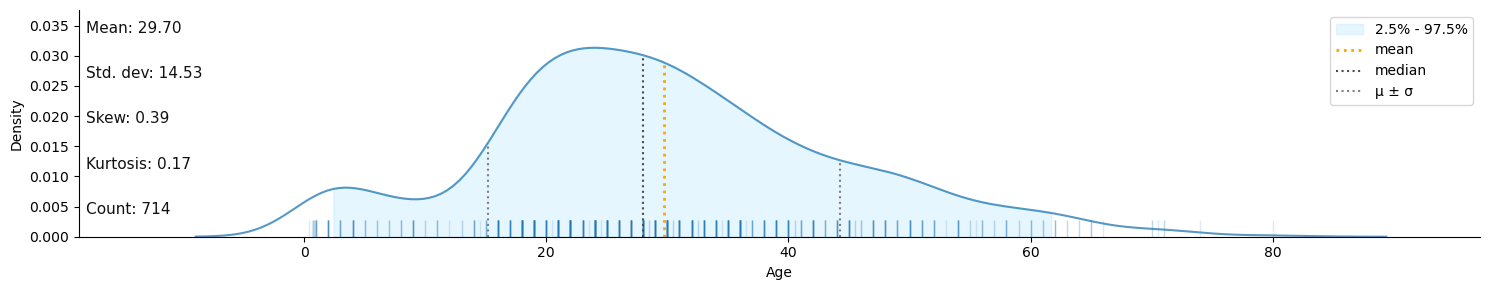

In [21]:
klib.dist_plot(df_train['Age'])

Histogram graph showing the differences between age and survival

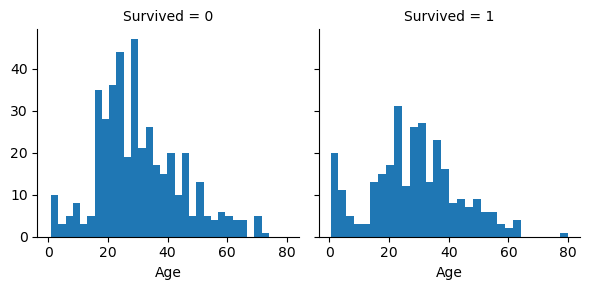

In [22]:
g = sns.FacetGrid(df_train, col='Survived')
g.map(plt.hist, 'Age', bins=30)

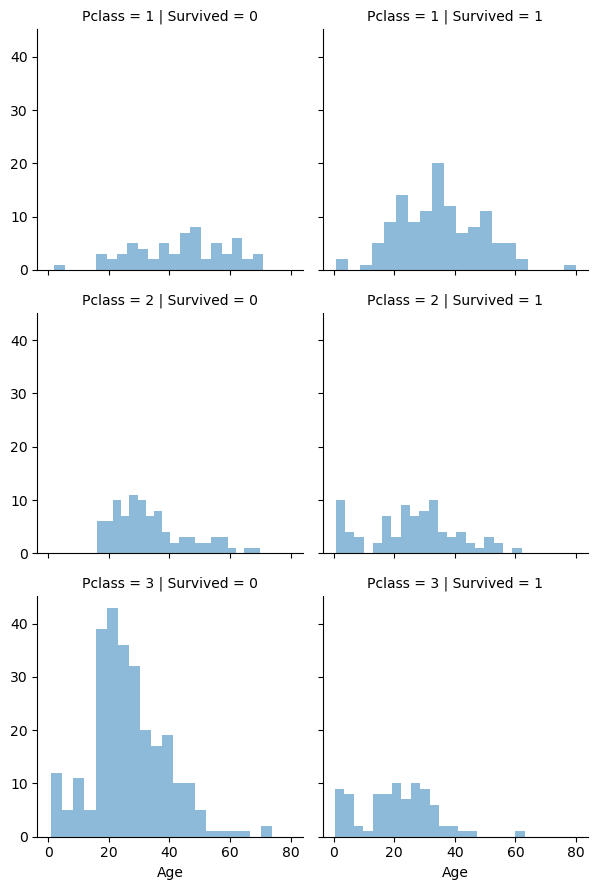

In [23]:
grid = sns.FacetGrid(df_train, col='Survived', row='Pclass')
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

**Outcome:** The graphs show that lower class young passangers were likely not to survived and upper class passengers were likely to survive regardless of age. 

Groupby dataframe by Embarked feature to calculate survival rate

In [24]:
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957

Density of SibSp:

<AxesSubplot: xlabel='SibSp', ylabel='Density'>

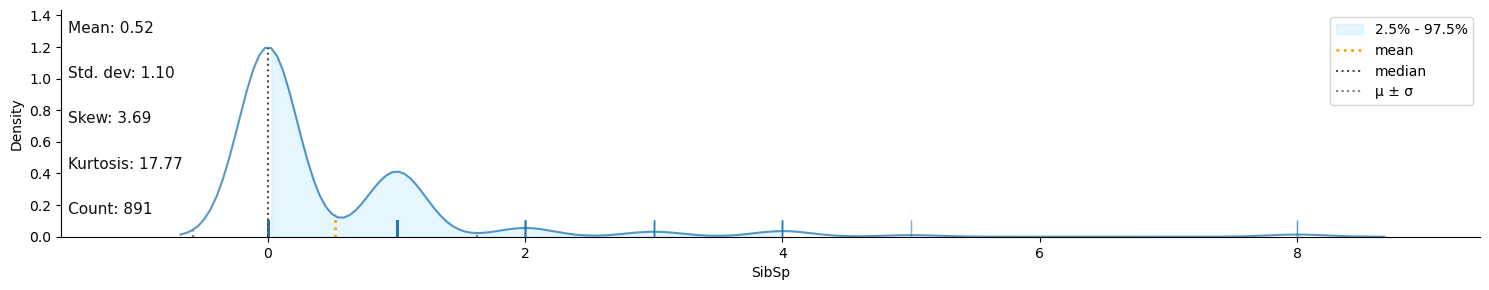

In [25]:
klib.dist_plot(df_train['SibSp'])

Density of Parch:

<AxesSubplot: xlabel='Parch', ylabel='Density'>

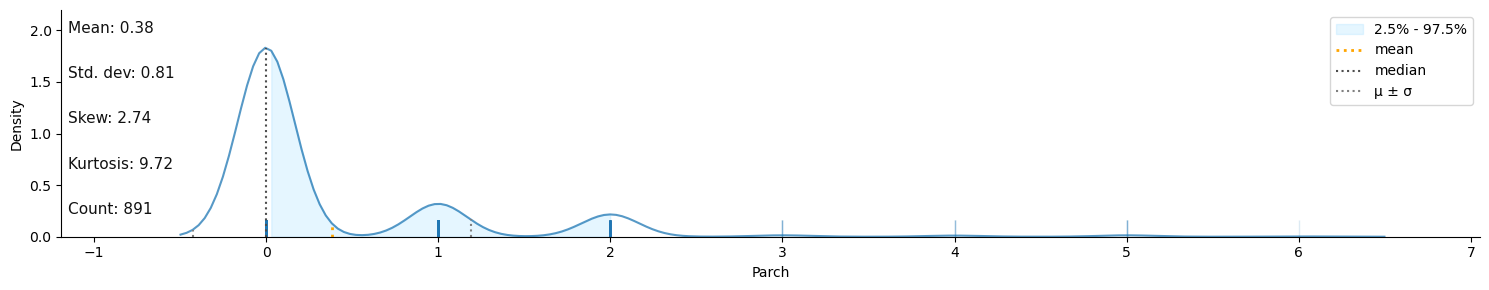

In [26]:
klib.dist_plot(df_train['Parch'])

**Outcome:** Passengers were likely to travel alone.

### Feature engineering

In [27]:
from itertools import product

#Filling missing age according to the Sex and Pclass median value
def fill_missing_age (dataset):
    if debug:
        print('Age Imputer Started...')
    median_age=np.zeros((2,3))
    
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            median_age[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1), 'Age'] = median_age[i,j]

    
    dataset['Age']=dataset['Age'].astype(int)
    if debug:
        print('!!!!!!!!! Age Imputer Completed')
    return dataset    


In [28]:
#make an ordinal category according to the age attribute

def Age_category (dataset):
    if debug:
        print('Age_category Imputer Started...')
    bin_edges = [0,16,32,48,64,80]
    dataset['AgeCategory']=pd.cut(dataset['Age'], bins=bin_edges, labels=[1, 2, 3, 4, 5])
    #dataset['AgeCategory']=dataset['AgeCategory'].astype(int)
    if debug:
        print('!!!!!!!!! Age_category Completed')
    return dataset

In [29]:
#make a new column to combine both SibSp and Parch columns
def number_of_family (dataset):
    if debug:
        print('number_of_family Started...')
    dataset['familysize']=(dataset['SibSp'].astype(int))+(dataset['Parch'].astype(int))
    if debug:
        print('!!!!!!!!! number_of_family Completed')
    return dataset


-When we dive into data for fare feature:

- Minimum is 0 and there are 15
- Median is 14.5
- Mean is 32
- 95-th percentile is 112
- Maximum is 512 and there are 3, 2nd maximum is 263 and there are 4.
- Common values between 7 and 26.
Therefore, there is a huge difference between the price of tickets.</br>
Therefore bin_edges is determined as follows: </br>

bin_edges = [0,8,15,32,512]

In [31]:
#make an ordinal category according to the fare attribute

def Fare_category (dataset):
    if debug:
        print('Fare_category Started...')
    bin_edges = [0,8,15,32,512]
    dataset['Fare']=pd.cut(dataset['Fare'], bins=bin_edges, labels=[1, 2, 3, 4])
    if debug:
        print('!!!!!!!!!Fare_category Completed')
    return dataset



In [32]:
#create new column called Title to categorize Name column
df_train['Name'].str.split(',').str[1].str.split('.').str[0].str.strip().value_counts()
df_train['Name'].str.split(',').str[1].str.split('.').str[0].str.strip().unique()


array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [33]:
#Create a Title column as a categorical column using the Name column

def Name_category (dataset):
    if debug:
        print('Name_category Started...')
    dataset['Title'] = dataset['Name'].str.split(',').str[1].str.split('.').str[0].str.strip()
    #replace all titles' value to rare
    dataset['Title']=dataset['Title'].replace(['Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'],'Rare')
    
    #mapping for title column
    title_mapping={'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Rare':5}
    dataset['Title']=dataset['Title'].map(title_mapping)
    dataset['Title']=dataset['Title'].fillna(5)
    dataset['Title']=dataset['Title'].astype(int)
    if debug:
        print('!!!!! Name_category Completed')
    return dataset
    


In [34]:
def Age_Sex_Pclass (dataset):
    if debug:
        print('Age_Sex_Pclass Started...')
    dataset['Age_Sex_Pclass']=dataset['AgeCategory'].astype(float)*dataset['Pclass'].astype(float)*(dataset['Sex']+1).astype(float)
    if debug:
        print('!!!!! Age_Sex_Pclass Completed')
    return dataset

In [35]:
#Drop Ticket, Cabin, PassengerId, Name, SibSp, Parch and Age features


def drop_features(dataset,features_to_drop=['Ticket','Cabin','Age','SibSp','Parch','PassengerId','Name']):
    if debug:
        print('drop_features Started...')
    dataset.drop(features_to_drop, axis=1,inplace=True)
    if debug:
        print('!!!!! drop_features Completed')
    return dataset

## Create a Pipeline

In [36]:
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w")


In [37]:
# Define categorical and numerical features
categorical_features = ["AgeCategory", "Sex", "Embarked", "Fare", "Title","Pclass"]
numerical_features = ["familysize","Age_Sex_Pclass"]

# Create transformers for preprocessing
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)

numerical_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)



In [38]:
# Create a dictionary to save model accuracies
model_accuracies = {}
model_accuracies_train = {}
best_params_dict = {}
model_feature_importances = {}

# Define Classifiers Dictionary
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Perceptron": Perceptron(),
    "Naive Bayes": GaussianNB(),
    "SGD": SGDClassifier(),
}

# Create a pipeline with FunctionTransformers, preprocessor, and classifier
for classifier_name, classifier in classifiers.items():
    X_train = df_train.drop('Survived',axis=1)
    y_train = df_train[['Survived']]

    X_test = df_test.drop('Survived',axis=1)
    y_test = df_test[['Survived']]

    X_train2 = X_train.copy()
    
    clf = Pipeline(
                steps=[
                        ("Binary_sex", FunctionTransformer(func=Binary_sex)),
                        ("fill_missing_age", FunctionTransformer(func=fill_missing_age)),
                        ("Age_category", FunctionTransformer(func=Age_category)),
                        ("number_of_family", FunctionTransformer(func=number_of_family)),
                        ("Fare_category", FunctionTransformer(func=Fare_category)),
                        ("Name_category", FunctionTransformer(func=Name_category)),
                        ("Age_Sex_Pclass", FunctionTransformer(func=Age_Sex_Pclass)),
                        ("drop_features", FunctionTransformer(func=drop_features)),
                        ("preprocessor", preprocessor),
                        ("classifier", classifier),
                    ]
                )
    # Define hyperparameters to search for each classifier
    param_grid = {}
    if classifier_name == "Logistic Regression":
        param_grid = {"classifier__C": [0.1,0.5, 1, 5, 50]}
    elif classifier_name == "Random Forest":
        param_grid = {
            "classifier__n_estimators": [20, 100, 200, 300, 500],
            "classifier__max_depth": [3, 10, 20, 30, 50],
        }
    elif classifier_name == "Gradient Boosting":
        param_grid = {
            "classifier__n_estimators": [50, 100, 200, 500],
            "classifier__learning_rate": [0.001, 0.01, 0.1, 0.2, 0.5],
        }
    elif classifier_name == "SVM":
        param_grid = {
            "classifier__C": [0.1, 1, 10],
            "classifier__kernel": ["linear"],
        }
    elif classifier_name == "Decision Tree":
        param_grid = {"classifier__max_depth": [5, 10, 20, 30]}
    elif classifier_name == "KNN":
        param_grid = {"classifier__n_neighbors": [3, 5, 7]}
    elif classifier_name == "Perceptron":
        param_grid = {"classifier__max_iter": [100, 200, 300]}
    elif classifier_name == "Naive Bayes":
        param_grid = {}
    elif classifier_name == "SGD":
        param_grid = {
            "classifier__max_iter": [100, 200, 300],
            "classifier__loss": ["hinge", "log", "perceptron"],
        }

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(clf, param_grid, cv=5, scoring="accuracy")
    grid_search.fit(X_train, y_train)

    # Get the best model from the grid search for each classifier
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Make predictions on the test data using the best model for each classifier
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train2)

    # Calculate and save the accuracy for each classifier
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[classifier_name] = accuracy
    
    accuracy_train = accuracy_score(y_train, y_pred_train)
    model_accuracies_train[classifier_name] = accuracy_train
    
    best_params_dict[classifier_name] = str(best_params)
    
    # Check if the classifier has feature importances attribute
    if hasattr(best_model.named_steps['classifier'], 'feature_importances_'):
        feature_importances = best_model.named_steps['classifier'].feature_importances_
        model_feature_importances[classifier_name] = feature_importances


# Print the model accuracies
for classifier_name, accuracy in model_accuracies.items():
    print(f"\n{classifier_name} Test Accuracy: {accuracy:.2f}")
    print(f"{classifier_name} Train Accuracy: {accuracy_train:.2f}")
    print(f"{classifier_name} Best Params: {best_params_dict[classifier_name]}")
        

/Users/senakaya/anaconda3/envs/customer_segment/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/senakaya/anaconda3/envs/customer_segment/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/senakaya/anaconda3/envs/customer_segment/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/senakaya/anaconda3/envs/customer_segment/lib/python3.8/site-packages/sklearn/utils/validation.py

/Users/senakaya/anaconda3/envs/customer_segment/lib/python3.8/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/senakaya/anaconda3/envs/customer_segment/lib/python3.8/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/senakaya/anaconda3/envs/customer_segment/lib/python3.8/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/senakaya/anaconda3/envs/customer_segment/lib/python3.8/site-packages/sklearn/base.py:1151:

/Users/senakaya/anaconda3/envs/customer_segment/lib/python3.8/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/senakaya/anaconda3/envs/customer_segment/lib/python3.8/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/senakaya/anaconda3/envs/customer_segment/lib/python3.8/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/senakaya/anaconda3/envs/customer_segment/lib/python3.8/site-packages/sklearn/base.py:1151:

/Users/senakaya/anaconda3/envs/customer_segment/lib/python3.8/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/senakaya/anaconda3/envs/customer_segment/lib/python3.8/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/senakaya/anaconda3/envs/customer_segment/lib/python3.8/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/senakaya/anaconda3/envs/customer_segment/lib/python3.8/site-packages/sklearn/base.py:1151:

/Users/senakaya/anaconda3/envs/customer_segment/lib/python3.8/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/senakaya/anaconda3/envs/customer_segment/lib/python3.8/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/senakaya/anaconda3/envs/customer_segment/lib/python3.8/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/senakaya/anaconda3/envs/customer_segment/lib/python3.8/site-packages/sklearn/base.py:1151:

/Users/senakaya/anaconda3/envs/customer_segment/lib/python3.8/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/senakaya/anaconda3/envs/customer_segment/lib/python3.8/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/senakaya/anaconda3/envs/customer_segment/lib/python3.8/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/senakaya/anaconda3/envs/customer_segment/lib/python3.8/site-packages/sklearn/base.py:1151:

/Users/senakaya/anaconda3/envs/customer_segment/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/senakaya/anaconda3/envs/customer_segment/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/senakaya/anaconda3/envs/customer_segment/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/senakaya/anaconda3/envs/customer_segment/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:424: DataConversio

/Users/senakaya/anaconda3/envs/customer_segment/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/senakaya/anaconda3/envs/customer_segment/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/senakaya/anaconda3/envs/customer_segment/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/senakaya/anaconda3/envs/customer_segment/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:424: DataConversio

/Users/senakaya/anaconda3/envs/customer_segment/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/senakaya/anaconda3/envs/customer_segment/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/senakaya/anaconda3/envs/customer_segment/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/senakaya/anaconda3/envs/customer_segment/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:424: DataConversio

/Users/senakaya/anaconda3/envs/customer_segment/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/senakaya/anaconda3/envs/customer_segment/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/senakaya/anaconda3/envs/customer_segment/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/senakaya/anaconda3/envs/customer_segment/lib/python3.8/site-packages/sklearn/utils/validation.py

/Users/senakaya/anaconda3/envs/customer_segment/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/senakaya/anaconda3/envs/customer_segment/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/senakaya/anaconda3/envs/customer_segment/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/senakaya/anaconda3/envs/customer_segment/lib/python3.8/site-packages/sklearn/utils/validation.py

/Users/senakaya/anaconda3/envs/customer_segment/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/senakaya/anaconda3/envs/customer_segment/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/senakaya/anaconda3/envs/customer_segment/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/senakaya/anaconda3/envs/customer_segment/lib/python3.8/site-packages/sklearn/utils/validation.py


Logistic Regression Test Accuracy: 0.75
Logistic Regression Train Accuracy: 0.79
Logistic Regression Best Params: {'classifier__C': 50}

Random Forest Test Accuracy: 0.75
Random Forest Train Accuracy: 0.79
Random Forest Best Params: {'classifier__max_depth': 30, 'classifier__n_estimators': 500}

Gradient Boosting Test Accuracy: 0.75
Gradient Boosting Train Accuracy: 0.79
Gradient Boosting Best Params: {'classifier__learning_rate': 0.01, 'classifier__n_estimators': 500}

SVM Test Accuracy: 0.75
SVM Train Accuracy: 0.79
SVM Best Params: {'classifier__C': 10, 'classifier__kernel': 'linear'}

Decision Tree Test Accuracy: 0.73
Decision Tree Train Accuracy: 0.79
Decision Tree Best Params: {'classifier__max_depth': 5}

KNN Test Accuracy: 0.73
KNN Train Accuracy: 0.79
KNN Best Params: {'classifier__n_neighbors': 7}

Perceptron Test Accuracy: 0.74
Perceptron Train Accuracy: 0.79
Perceptron Best Params: {'classifier__max_iter': 100}

Naive Bayes Test Accuracy: 0.71
Naive Bayes Train Accuracy: 0

/Users/senakaya/anaconda3/envs/customer_segment/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/senakaya/anaconda3/envs/customer_segment/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/senakaya/anaconda3/envs/customer_segment/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/senakaya/anaconda3/envs/customer_segment/lib/python3.8/site-packages/sklearn/utils/validation.py

In [39]:

df_training_acc = pd.DataFrame(model_accuracies_train.values(), index=model_accuracies_train.keys(), columns=["Training Accuracy"])
df_test_acc = pd.DataFrame(model_accuracies.values(), index=model_accuracies.keys(), columns=["Test Accuracy"])
df_best_params = pd.DataFrame(best_params_dict.values(), index=best_params_dict.keys(), columns=["Best Params"])


# Concatenate DataFrames along columns axis
combined_results = pd.concat([df_training_acc, df_test_acc, df_best_params], axis=1)

display(combined_results.sort_values(by='Test Accuracy', ascending=False))

Training Accuracy  Test Accuracy  \
Random Forest                 0.886644       0.751196   
Gradient Boosting             0.855219       0.751196   
SVM                           0.835017       0.751196   
Logistic Regression           0.835017       0.746411   
Perceptron                    0.804714       0.736842   
KNN                           0.857464       0.732057   
Decision Tree                 0.857464       0.729665   
Naive Bayes                   0.778900       0.705742   
SGD                           0.785634       0.693780   

                                                           Best Params  
Random Forest        {'classifier__max_depth': 30, 'classifier__n_e...  
Gradient Boosting    {'classifier__learning_rate': 0.01, 'classifie...  
SVM                  {'classifier__C': 10, 'classifier__kernel': 'l...  
Logistic Regression                              {'classifier__C': 50}  
Perceptron                               {'classifier__max_iter': 100}  
KNN                                     {'classifier__n_neighbors': 7}  
Decision Tree                             {'classifier__max_depth': 5}  
Naive Bayes                                                         {}  
SGD                  {'classifier__loss': 'hinge', 'classifier__max...

**Outcomes**</br>

So, here's what I found about our models. When it comes to accuracy on the test dataset (how well the models perform on new, unseen data), both Gradient Boosting (GB) and Support Vector Machine (SVM) did equally well, with an accuracy score of 0.75. However, if we look at their performance on the training dataset (the data they were trained on), GB had a higher accuracy compared to SVM. This suggests that GB learned the training data patterns better.</br>

Now, let's talk about Random Forest. It had the highest training data accuracy score of 0.89, which means it performed exceptionally well on the data it was trained on. This is great for capturing the training data's complexity.</br>

In a nutshell, Gradient Boosting is a strong performer both in training and testing, while Random Forest excels specifically in training. It's important to strike a balance between high training accuracy and good test accuracy to ensure your model generalizes well to new data.</br>

There doesn't seem to be any overfitting going on. That means our models are doing well on both the training and test datasets without any discrepancies in accuracy.

In [40]:
best_model

Pipeline(steps=[('Binary_sex',
                 FunctionTransformer(func=<function Binary_sex at 0x169bb8820>)),
                ('fill_missing_age',
                 FunctionTransformer(func=<function fill_missing_age at 0x175b25ca0>)),
                ('Age_category',
                 FunctionTransformer(func=<function Age_category at 0x175b258b0>)),
                ('number_of_family',
                 FunctionTransformer(func=<function number_of_family at 0x175b25940>)),
                ('Fare...
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['familysize',
                                                   'Age_Sex_Pclass']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['AgeCategory', 'Sex',
                                                   'Embarked', 'Fare', 'Title',
                                                   'Pclass'])])),
                ('classifier', SGDClassifier(max_iter=100))])

### PLOT FEATURE IMPORTANCES

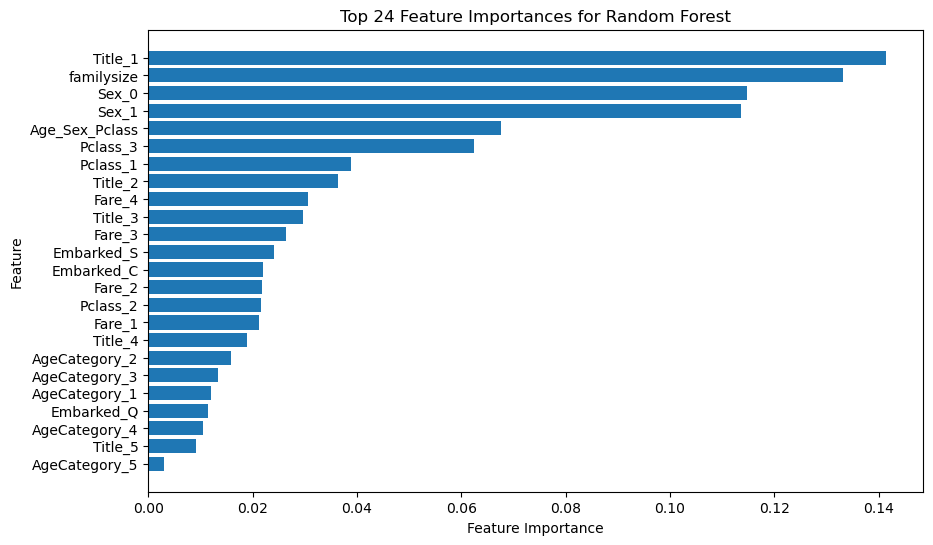

In [41]:

best_classifier = max(model_accuracies, key=model_accuracies.get)

# Check if the best classifier has feature importances available
if best_classifier in model_feature_importances:
    feature_importances = model_feature_importances[best_classifier]

    # Get the preprocessing step from the best model
    preprocessor = best_model.named_steps['preprocessor']

    if isinstance(preprocessor, ColumnTransformer):
        # Find the transformer that contains the OneHotEncoder
        for name, transformer, columns in preprocessor.transformers_:
            if name == 'cat':
                # Access the OneHotEncoder
                one_hot_encoder = transformer.named_steps['onehot']
                # Get feature names after one-hot encoding
                feature_names_after_encoding = one_hot_encoder.get_feature_names_out(input_features=columns)

    # Combine feature names from one-hot encoding with numeric feature names
    all_feature_names = np.concatenate((['familysize', 'Age_Sex_Pclass'],feature_names_after_encoding))

    # Sort the features by importance in descending order
    feature_importance_sorted_idx = np.argsort(feature_importances)[::-1]
    feature_importances_sorted = feature_importances[feature_importance_sorted_idx]
    feature_names_sorted = all_feature_names[feature_importance_sorted_idx]

    # Plot the feature importances for the top features (e.g., top 10)
    top_n = 24
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names_sorted[:top_n], feature_importances_sorted[:top_n])
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title(f'Top {top_n} Feature Importances for {best_classifier}')
    plt.gca().invert_yaxis()  # Invert y-axis to show most important features at the top
    plt.show()


**Outcomes**</br>

When we dig into our model and look at which factors really matter, we're talking about something called "**feature importance**". It's like trying to figure out who the real stars of the show are among our input variables.</br>

Based on our feature importance analysis, it turns out that the top five factors that have the biggest impact on our predictions or explaining the patterns we see in our data are:</br>

- "Title1 (Mr.)" – Yep, having the title "Mr." seems to be a significant deal.
- "Pclass3 (lower socio-economic status)" – It looks like being in a lower socio-economic class is a key player.
- "Family Size" – The size of the family you're traveling with also matters.
- "Title5 (Rare)" – Uncommon titles are surprisingly influential.
- "Age_Sex_Pclass (AgeSexPclass)" – This combination of age, sex, and passenger class is a real game-changer.</br>
So, these are the big hitters in our model, the ones that really drive our predictions and help us make sense of the data.

